<a href="https://colab.research.google.com/github/Yashgabani845/ml/blob/main/Deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = x_train/255
x_test = x_test/255
#we are normalising the value of the pixcels between 0 to 1 from 0 to 255
# now we have to define the model architecture
model = Sequential([
    Flatten(input_shape=(28,28)), #flatten is converting the array of 28x28 into 784 1D array
    Dense(128, activation='relu'),  # First hidden layer with 64 neurons
    Dense(64, activation='relu'),    # Second hidden layer with 64 neurons
    Dense(10, activation='softmax')  # Output layer with 10 neurons (one for each digit)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8743 - loss: 0.4281 - val_accuracy: 0.9599 - val_loss: 0.1313
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9658 - loss: 0.1091 - val_accuracy: 0.9704 - val_loss: 0.0885
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9795 - loss: 0.0697 - val_accuracy: 0.9729 - val_loss: 0.0911
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9834 - loss: 0.0524 - val_accuracy: 0.9770 - val_loss: 0.0762
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9870 - loss: 0.0389 - val_accuracy: 0.9739 - val_loss: 0.0851
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9897 - loss: 0.0320 - val_accuracy: 0.9786 - val_loss: 0.0737
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9909 - loss: 0.0270 - val_accuracy: 0.9777 - val_loss: 0.0786
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9932 - loss: 0.0218

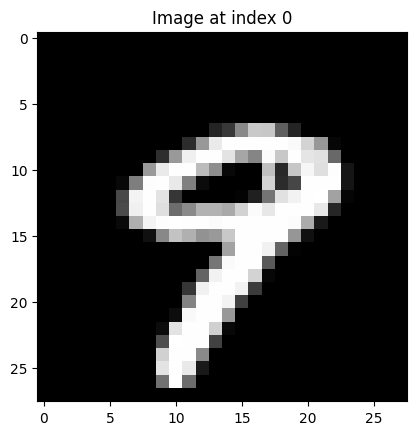

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Model predicts: 7
Actual digit: 7


In [13]:
import matplotlib.pyplot as plt
plt.imshow(x_test[9], cmap='gray')
plt.title("Image at index 0")
plt.show()
prediction = model.predict(x_test[0].reshape(1, 28, 28))
predicted_digit = prediction.argmax()
print(f"Model predicts: {predicted_digit}")
print(f"Actual digit: {y_test[0]}")

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Sample data (replace with actual churn dataset)
# Let's assume 'X' contains the customer data and 'y' is the target (churn: 0 or 1)
X = np.array([[35, 1, 500, 2], [40, 0, 1000, 3], [25, 1, 1500, 1]])  # Example features
y = np.array([0, 1, 0])  # Churn (0 = No, 1 = Yes)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the ANN model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Add second hidden layer
model.add(Dense(32, activation='relu'))

# Output layer (binary classification: churn or not)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Make predictions
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary labels (0 or 1)

# Evaluate additional metrics (optional)
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 1.0000 - loss: 0.5386 - val_accuracy: 0.0000e+00 - val_loss: 0.7496
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step - accuracy: 1.0000 - loss: 0.5159 - val_accuracy: 0.0000e+00 - val_loss: 0.7692
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 1.0000 - loss: 0.4942 - val_accuracy: 0.0000e+00 - val_loss: 0.7884
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 1.0000 - loss: 0.4732 - val_accuracy: 0.0000e+00 - val_loss: 0.8076
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 1.0000 - loss: 0.4527 - val_accuracy: 0.0000e+00 - val_loss: 0.8269
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 1.0000 - loss: 0.4328 - val_accuracy: 0.0000e+00 - val_loss: 0.8481
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 1.0000 - loss: 0.4142 - val_accuracy: 0.0000e+00 - val_loss: 0.8694
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 1.0000 - loss: 0.3963 - val_accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [4]:
import numpy as np

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Sigmoid derivative (for backpropagation)
def sigmoid_derivative(x):
    return x * (1 - x)

# Binary cross-entropy loss function
def binary_crossentropy(y_true, y_pred):
    # Adding a small epsilon to prevent log(0)
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Custom Neural Network class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases with small random values
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Weights between input and hidden layer
        self.W1 = np.random.randn(self.input_size, self.hidden_size)
        self.b1 = np.zeros((1, self.hidden_size))

        # Weights between hidden and output layer
        self.W2 = np.random.randn(self.hidden_size, self.output_size)
        self.b2 = np.zeros((1, self.output_size))

    def forward(self, X):
        # Forward pass through the network
        self.hidden_input = np.dot(X, self.W1) + self.b1
        self.hidden_output = sigmoid(self.hidden_input)

        self.final_input = np.dot(self.hidden_output, self.W2) + self.b2
        self.final_output = sigmoid(self.final_input)

        return self.final_output

    def backward(self, X, y, learning_rate):
        # Backward pass (gradient computation)
        # Calculate the error
        output_error = self.final_output - y
        output_delta = output_error * sigmoid_derivative(self.final_output)

        hidden_error = output_delta.dot(self.W2.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_output)

        # Update weights and biases using gradient descent
        self.W2 -= self.hidden_output.T.dot(output_delta) * learning_rate
        self.b2 -= np.sum(output_delta, axis=0, keepdims=True) * learning_rate

        self.W1 -= X.T.dot(hidden_delta) * learning_rate
        self.b1 -= np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        # Train the network using backpropagation
        for epoch in range(epochs):
            # Perform forward pass
            output = self.forward(X)

            # Perform backward pass
            self.backward(X, y, learning_rate)

            # Optionally print the loss every 100 epochs
            if epoch % 100 == 0:
                loss = np.mean(binary_crossentropy(y, output))
                print(f'Epoch {epoch}, Loss: {loss}')

    def predict(self, X):
        # Predict the output for the input data
        return self.forward(X)

# Sample Data: X is input features, y is the target (0 or 1)
# Let's assume a simple binary classification problem where we have two features
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([[0], [1], [1], [0]])  # XOR problem

# Initialize and train the neural network
nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=1)
nn.train(X, y, epochs=10000, learning_rate=0.1)

# Test the trained model
predictions = nn.predict(X)
print("Predictions:")
print(predictions)

# Convert predictions to binary (0 or 1)
predictions_binary = (predictions > 0.5).astype(int)
print("Binary Predictions:")
print(predictions_binary)


Epoch 0, Loss: 0.8738388482853707
Epoch 100, Loss: 0.6739434460831092
Epoch 200, Loss: 0.6609642276158595
Epoch 300, Loss: 0.6472473118500764
Epoch 400, Loss: 0.6307429590156646
Epoch 500, Loss: 0.6106457370689734
Epoch 600, Loss: 0.5865865174580249
Epoch 700, Loss: 0.5583304609414986
Epoch 800, Loss: 0.5257060584167189
Epoch 900, Loss: 0.4888235218357234
Epoch 1000, Loss: 0.44851710017561014
Epoch 1100, Loss: 0.406599692132177
Epoch 1200, Loss: 0.3654889301245083
Epoch 1300, Loss: 0.3273667892701142
Epoch 1400, Loss: 0.2935452670098068
Epoch 1500, Loss: 0.26440093076961035
Epoch 1600, Loss: 0.23967564382656642
Epoch 1700, Loss: 0.21881611307264803
Epoch 1800, Loss: 0.20120144551653435
Epoch 1900, Loss: 0.1862557772015527
Epoch 2000, Loss: 0.17348833257674984
Epoch 2100, Loss: 0.1624976483376045
Epoch 2200, Loss: 0.15296155891285312
Epoch 2300, Loss: 0.14462341512673538
Epoch 2400, Loss: 0.13727888069511296
Epoch 2500, Loss: 0.13076473939097602
Epoch 2600, Loss: 0.12494991238396655
Epo